<a href="https://colab.research.google.com/github/tuba1079/python-series02/blob/main/python_series02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sinusoidal Signals
This notebook plots a sine wave using NumPy and Matplotlib.


$$ s(t) = \sin(2 \pi t) $$

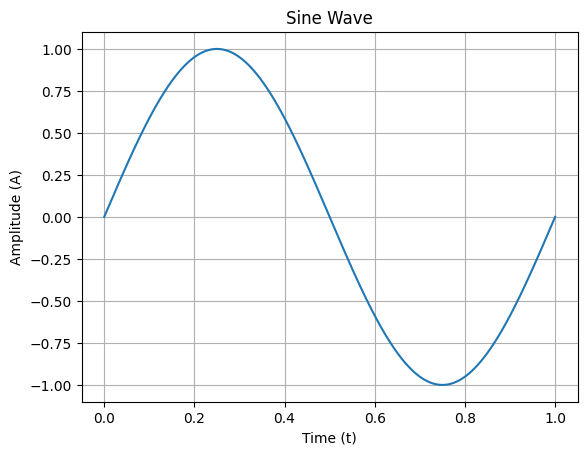

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create 1000 values between 0 and 1 (time)
t = np.linspace(0, 1, 1000)

# sine function values
s = np.sin(2 * np.pi * t)

# plot the sine wave
plt.plot(t, s)
plt.title("Sine Wave")
plt.xlabel("Time (t)")
plt.ylabel("Amplitude (A)")
plt.grid(True)

# save the plot as an image
plt.savefig("sine_wave.png")

plt.show()


## 1.2) Better version: add cosine, legend, second y-axis, labels, save to PDF
We'll produce a figure with sine on the left y-axis and cosine on a secondary y-axis to satisfy the requirements.

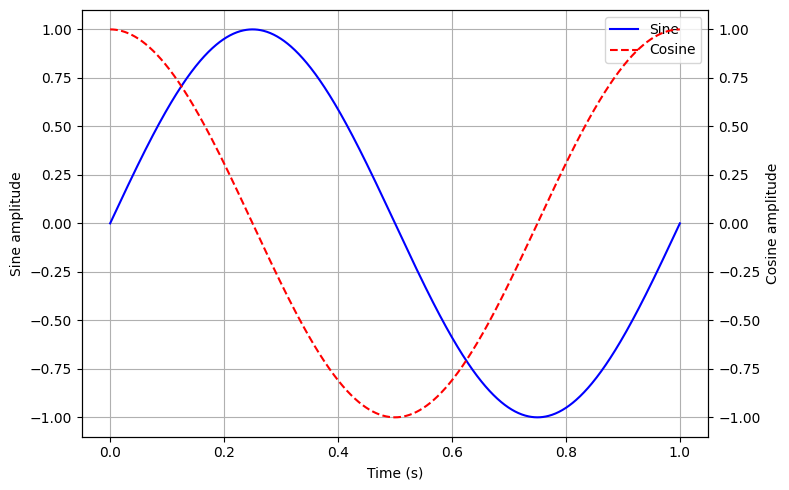

In [1]:
# 1.2) Better version
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 1000)
sine = np.sin(2 * np.pi * t)
cosine = np.cos(2 * np.pi * t)

fig, ax1 = plt.subplots(figsize=(8,5))

# Plot sine
ln1 = ax1.plot(t, sine, label='Sine', color='blue')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Sine amplitude')

# Plot cosine on second y-axis
ax2 = ax1.twinx()
ln2 = ax2.plot(t, cosine, label='Cosine', color='red', linestyle='--')
ax2.set_ylabel('Cosine amplitude')

# Combine legends
lines = ln1 + ln2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')

ax1.grid(True)
fig.tight_layout()
plt.savefig('sine_cosine_plot.pdf')
plt.show()


## 1.3) Final version: clean functions, parameters, and reusable plotting
We wrap logic in functions, add docstrings, type hints, and perform basic parameter validation.

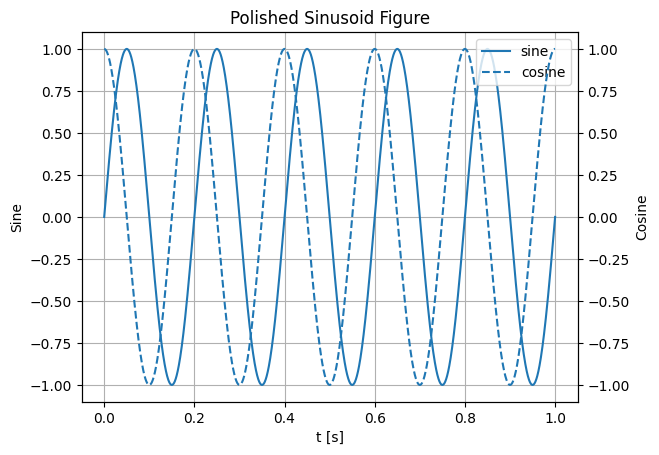

In [3]:
# 1.3) Final version with functions
from typing import Tuple
import numpy as np
import matplotlib.pyplot as plt

def make_time(duration: float, num: int) -> np.ndarray:
    """Create a linearly spaced time vector from 0..duration with `num` samples."""
    if duration <= 0:
        raise ValueError("duration must be positive")
    if num < 2:
        raise ValueError("num must be >= 2")
    return np.linspace(0.0, duration, num, endpoint=True)

def sine_wave(t: np.ndarray, amplitude: float, freq_hz: float, phase_rad: float=0.0) -> np.ndarray:
    """Compute sine wave: A * sin(2π f t + φ)."""
    return amplitude * np.sin(2*np.pi*freq_hz*t + phase_rad)

def cosine_wave(t: np.ndarray, amplitude: float, freq_hz: float, phase_rad: float=0.0) -> np.ndarray:
    """Compute cosine wave: A * cos(2π f t + φ)."""
    return amplitude * np.cos(2*np.pi*freq_hz*t + phase_rad)

def plot_sine_cosine(t: np.ndarray, s: np.ndarray, c: np.ndarray, title: str, outpath: str) -> None:
    fig, ax1 = plt.subplots()
    l1 = ax1.plot(t, s, label="sine")
    ax1.set_xlabel("t [s]"); ax1.set_ylabel("Sine")
    ax1.grid(True)
    ax2 = ax1.twinx()
    l2 = ax2.plot(t, c, label="cosine", linestyle="--")
    ax2.set_ylabel("Cosine")
    ln = l1 + l2
    labs = [l.get_label() for l in ln]
    ax1.legend(ln, labs, loc="upper right")
    plt.title(title)
    plt.savefig(outpath, bbox_inches="tight")
    plt.show()

# Example: generate and save a polished plot
t = make_time(duration=1.0, num=2000)
s = sine_wave(t, amplitude=1.0, freq_hz=5.0, phase_rad=0.0)
c = cosine_wave(t, amplitude=1.0, freq_hz=5.0, phase_rad=0.0)
plot_sine_cosine(t, s, c, title="Polished Sinusoid Figure", outpath="sinusoid_final.pdf")

## 2) Reproducibility & Code Quality pointers
- Keep small, focused commits with clear messages.
- Document assumptions and parameter meanings.
- Prefer pure functions with inputs/outputs over hidden state.
- Validate parameters and add quick checks.
- Save figures with deterministic generation (seed random if needed).
- Use branches for iterations; open PRs even if working solo to self-review.

## 3.1) Even or odd — definition & implementation
**Definition:** An integer $n$ is even iff $\exists k\in\mathbb{Z}$ s.t. $n=2k$. Otherwise it is odd.

In [5]:
def is_even(n: int) -> bool:
    """Return True if n is even."""
    return (n % 2) == 0

series_0_10 = list(range(0, 11))
for n in series_0_10:
    print(f"{n} is {'even' if is_even(n) else 'odd'}")

0 is even
1 is odd
2 is even
3 is odd
4 is even
5 is odd
6 is even
7 is odd
8 is even
9 is odd
10 is even


## 3.2) Multiple or not — definition & functions
**Definition:** An integer $a$ is a multiple of $m \ne 0$ iff $\exists k\in\mathbb{Z}$ s.t. $a = k\,m$.

In [ ]:
from typing import Iterable, List

def is_multiple_of(n: int, m: int) -> bool:
    if m == 0:
        raise ValueError("m must be non-zero")
    return (n % m) == 0

def multiples_mask(seq: Iterable[int], m: int) -> List[bool]:
    return [is_multiple_of(x, m) for x in seq]

nums_0_20 = list(range(0, 21))

print("Multiples of 3:")
for x in nums_0_20:
    print(f"{x}: {'yes' if is_multiple_of(x, 3) else 'no'}")

print("\nMultiples of 5:")
for x in nums_0_20:
    print(f"{x}: {'yes' if is_multiple_of(x, 5) else 'no'}")

m = 7  # you can change this
print(f"\nMultiples of {m}:", multiples_mask(nums_0_20, m))

Multiples of 3:
0: yes
1: no
2: no
3: yes
4: no
5: no
6: yes
7: no
8: no
9: yes
10: no
11: no
12: yes
13: no
14: no
15: yes
16: no
17: no
18: yes
19: no
20: no

Multiples of 5:
0: yes
1: no
2: no
3: no
4: no
5: yes
6: no
7: no
8: no
9: no
10: yes
11: no
12: no
13: no
14: no
15: yes
16: no
17: no
18: no
19: no
20: yes

Multiples of 7: [True, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False]


## 3.3) Prime or not — definition & algorithms
**Definition:** An integer $p>1$ is prime iff its only positive divisors are 1 and $p$.

We implement: (1) a simple primality test; (2) Sieve of Eratosthenes for ranges; and demonstrate up to 20 million (Colab is fast, but be mindful of RAM).

In [ ]:
import math
from typing import List

def is_prime_basic(n: int) -> bool:
    if n < 2:
        return False
    if n % 2 == 0:
        return n == 2
    r = int(math.isqrt(n))
    for d in range(3, r+1, 2):
        if n % d == 0:
            return False
    return True

def sieve_primes_upto(N: int) -> List[int]:
    """Return list of primes in [0..N] using an optimized sieve."""
    if N < 2:
        return []
    # Only track odd numbers to halve memory
    size = (N // 2) + 1   # index i represents number 2*i+1
    sieve = bytearray(b"\x01") * size
    sieve[0] = 0  # 1 is not prime
    limit = int(math.isqrt(N))
    for i in range(1, (limit // 2) + 1):  # i for number p = 2*i+1
        if sieve[i]:
            p = 2*i + 1
            # start from p*p; index for p*p is ((p*p)-1)//2
            start = ((p*p) - 1) // 2
            sieve[start::p] = b"\x00" * ((size - start - 1)//p + 1)
    primes = [2] + [2*i+1 for i in range(1, size) if sieve[i]]
    return primes

# Primes in [0..20]
print("Primes in [0..20]:", [n for n in range(0, 21) if is_prime_basic(n)])

# Primes in [0..200]
pr200 = sieve_primes_upto(200)
print("\nPrimes in [0..200]:", pr200)

# Large range demo (be cautious with runtime/memory)
# Uncomment to run up to 20_000_000 (takes time and memory but works in Colab runtimes)
# big_primes = sieve_primes_upto(20_000_000)
# print("Number of primes <= 20,000,000:", len(big_primes))

Primes in [0..20]: [2, 3, 5, 7, 11, 13, 17, 19]

Primes in [0..200]: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199]
